![](https://i.imgur.com/0AUxkXt.png)

# Lab 2 - Pandas & Seaborn

## Import libraries

In [ ]:
# Your code here
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


## Import data

In this Lab we will use a dataset from seaborn library. The dataset contains tips data from different customers females and males, smokers and non smokers, from days, dinner or lunch and from different table size.

In [ ]:
# Run this code
tips = sns.load_dataset('tips')

### Overview

**Show the first 3 rows of the data**

In [ ]:
# Your code here
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### Show the last 2 rows of the data

In [ ]:
# Your code here
tips[-2:]

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Show 4 randoms rows

In [ ]:
# Your code here


# Randomly sample 70% of your dataframe
df_percent = tips.sample(frac=0.7)

# Randomly sample 7 elements from your dataframe
df_elements = tips.sample(n=4)
df_elements

,total_bill,tip,sex,smoker,day,time,size
16,10.33,1.67,Female,No,Sun,Dinner,3
151,13.13,2.00,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Print a concise summary of the data

Print information about the data including the index dtype and column dtypes, non-null values and memory usage.

In [ ]:
# Your code here
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


### Generate descriptive statistics

A descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [ ]:
# Your code here

## EDA - Exploratory Data Analysis

**What is the min/max of tip?**

In [ ]:
# Your code here
tips.min()

total_bill      3.07
tip                1
sex           Female
smoker            No
day              Fri
time          Dinner
size               1
dtype: object

In [ ]:
tips.max()

total_bill    50.81
tip              10
sex            Male
smoker          Yes
day            Thur
time          Lunch
size              6
dtype: object

**The restaurant is open on which days of the week?**

*Hint: unique values of the column `day`*

In [ ]:
# Your code here
tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

**List of unique values in column `time`**

In [ ]:
# Your code here
# tips

In [ ]:
tips['time'].unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

**What is the range of table size?**

In [ ]:
# Your code here
print(tips['size'].min())
print(tips['size'].max())

1
6


**How many man/woman paid for the dish?**


In [ ]:
# Your code here
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

**What is the percentage of smoker table and their revenue?**

In [ ]:
# Your code here
# Your code here
tips['smoker'].value_counts()
# tips['total_bill'] 


No     151
Yes     93
Name: smoker, dtype: int64

In [ ]:
revenue_no = tips[tips['smoker']=='No']['total_bill'].sum()
revenue_yes = tips[tips['smoker']=='Yes']['total_bill'].sum()

print(' percentage of smocker table is : {} and revenue is {}'.format(152/(93+152)*100 , revenue_no))
print(' percentage of other table is : {} and revenue is {}'.format(93/(93+152)*100 , revenue_yes))

 percentage of smocker table is : 62.04081632653061 and revenue is 2897.4299999999994
 percentage of other table is : 37.95918367346939 and revenue is 1930.3400000000001


**List 3 tables that have the most expensive bill**

In [ ]:
# Your code heret
tips.sort_values(by = ['total_bill'], ascending=False).head(3)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4


### Group by - Example

**What is the best day to work - maximum tips (sum and percents)?**

In [ ]:
tips2 = tips.groupby('day').sum()
tips2['percent'] = tips2['tip'] / tips2['total_bill'] * 100
tips2

,total_bill,tip,size,percent
day,,,,
Thur,1096.33,171.83,152,15.673201
Fri,325.88,51.96,40,15.944519
Sat,1778.40,260.40,219,14.642375
Sun,1627.16,247.39,216,15.203791


**Your turn: Who eats more (and tips more)? smokers or non smokers?**

In [ ]:
# Your code here
tips['smoker'].value_counts()
tips['total_bill'] 

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

### Data Visualization using Seaborn

**Visualize # of tables per day**

*Hint: using the seaborn's function **countplot()** with `x=day` and `data=tips`*

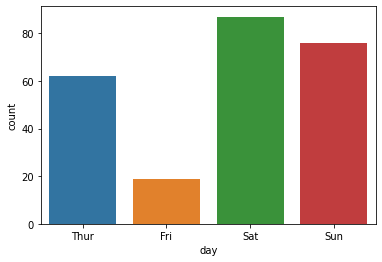

In [ ]:
# Your code here
sns.countplot(x = 'day' , data=tips )

**Visualize # of smoker and non-smoker tables**

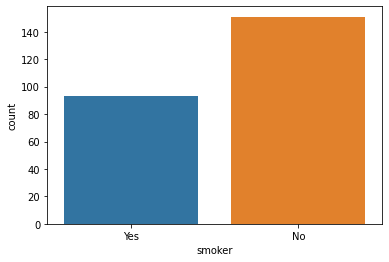

In [ ]:
# Your code here
sns.countplot(x = 'smoker', data= tips )


**Visualize # of male/female customers who pay**

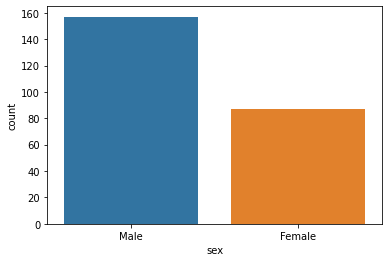

In [ ]:
# Your code here
sns.countplot(x = 'sex' ,data = tips )

**Analyze the distribution of payments of male and female in different days**

*Hint: countplot with `hue='sex'`*

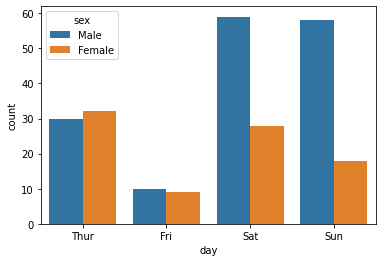

In [ ]:
# Your code here
sns.countplot(hue= 'sex', data = tips, x = 'day' )

**Analyze the # of tables in different time (lunch or dinner) and days**

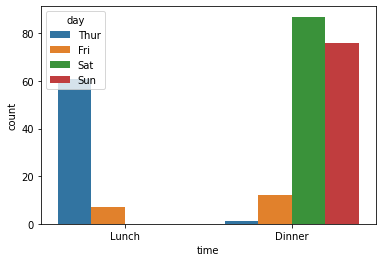

In [ ]:
# Your code here
sns.countplot(hue = 'day', data = tips, x = 'time' )


**Example: Visualize the distribution of the total bill**


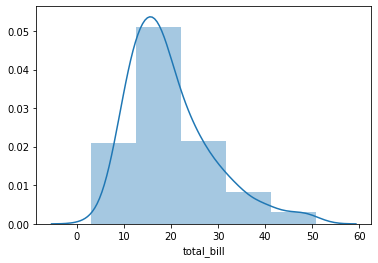

In [ ]:
sns.distplot(tips['total_bill'], bins=5)

**Visualize the distribution of the tip**

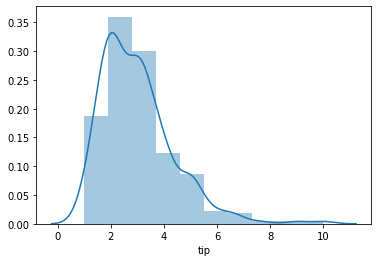

In [ ]:
# Your code here
sns.distplot(tips['tip'], bins = 10)


**Example: Scatter plot of tip and total bill**

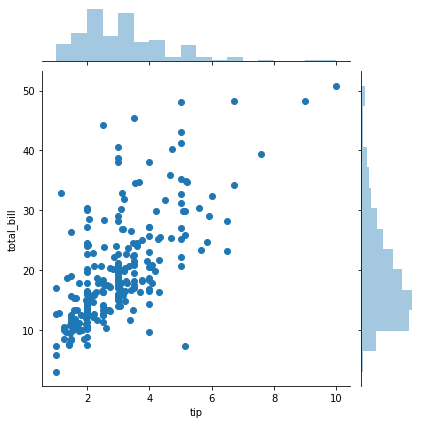

In [ ]:
sns.jointplot(x='tip', y='total_bill', data=tips)

**Add one more parameter `kind='hex'` to the previous   `jointplot()` function**

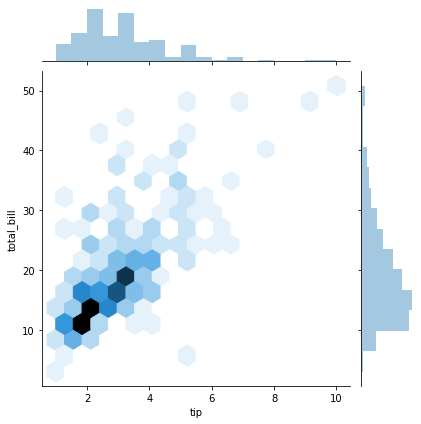

In [ ]:
# Your code here
sns.jointplot(x='tip', y = 'total_bill', data = tips,  kind= 'hex')

**Let's try with `kind='kde'` (KDE - Kernel Density Estimation)**

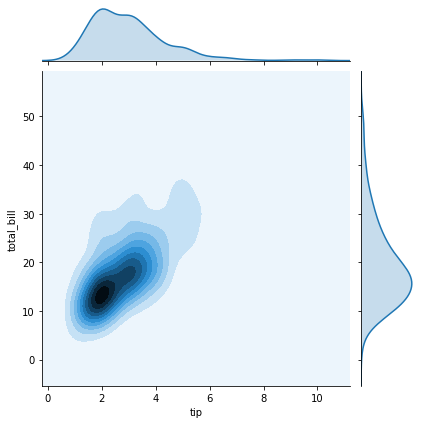

In [ ]:
# Your code here
sns.jointplot(x='tip', y = 'total_bill', data = tips,  kind= 'kde')

**Analyze the relationship between `size` and `tip`**

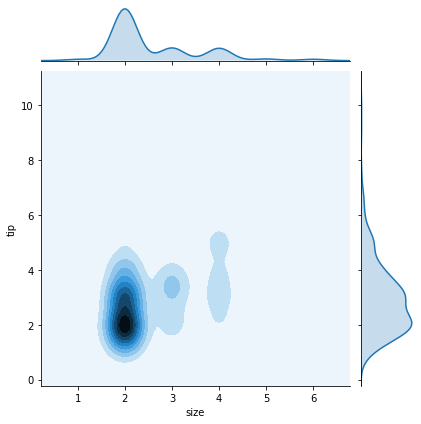

In [ ]:
# Your code here
sns.jointplot(x='size', y = 'tip', data = tips,  kind= 'kde')

**Correlation Matrix**

Show the correlation matrix and comfirm the analytics you have from previous steps.

In [ ]:
# Your code here
matrix_df =  tips[['total_bill','tip', 'size']]
matrix_df

corrMatrix = matrix_df.corr()
print (corrMatrix)
# print(matrix_df)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


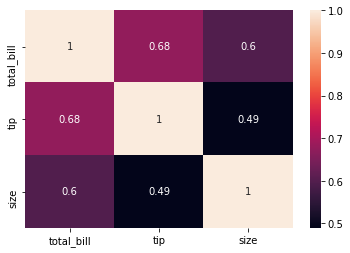

In [ ]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Box plot, Swarm plot and Violin plot**

![](https://i.imgur.com/5Lo17qp.png)

**Implement the seaborn's function `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

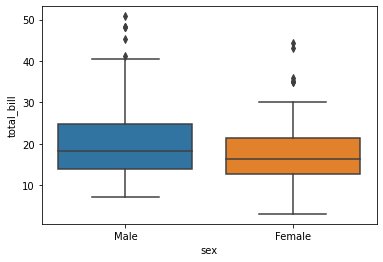

In [ ]:
# Your code here
sns.boxplot(x = 'sex', y = 'total_bill', data = tips)

**Implement `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

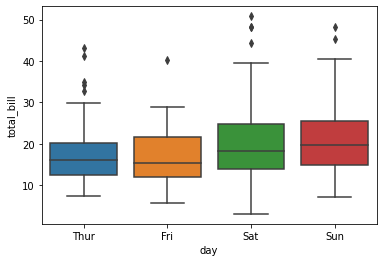

In [ ]:
# Your code here
sns.boxplot(x = 'day', y = 'total_bill', data = tips)

**Add `hue='smoker'` to the previous `boxplot()`**

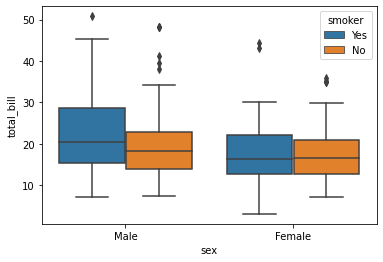

In [ ]:
# Your code here
sns.boxplot(x = 'sex', y = 'total_bill', data = tips , hue = 'smoker')

**Implement `swarmplot()` with: `x='day', y='tip', hue='smoker', data=tips`**

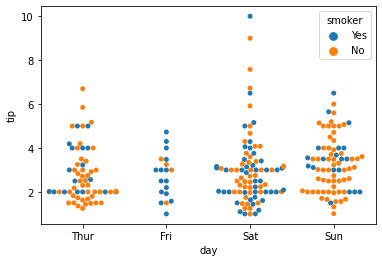

In [ ]:
# Your code here


sns.swarmplot(x = 'day',  y = 'tip', hue = 'smoker', data = tips)

**Implement previous chart with `violinplot()`**

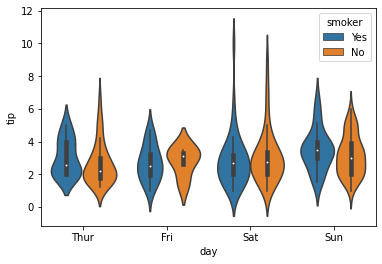

In [ ]:
# Your code here
sns.violinplot(x = 'day', y = 'tip', hue = 'smoker', data = tips)

### Bonus

**Total revenue per day**

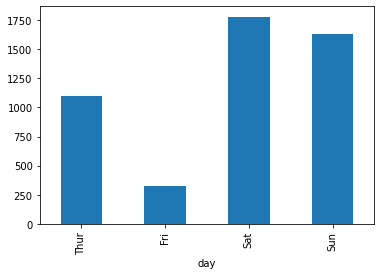

In [ ]:
tips.groupby('day').sum()['total_bill'].plot(kind='bar')

**Pie chart of table size in percentage**

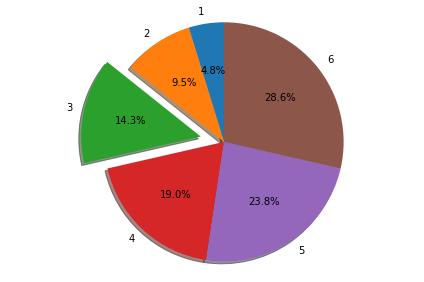

In [ ]:
import matplotlib.pyplot  as plt 

# Pie chart
labels = []
sizes = []
explode = []

labels = tips['size'].value_counts().index.sort_values()
for index, size in enumerate(labels):
    sizes.append(size)
    if size==3:
        explode.append(0.2)
    else:
        explode.append(0)
 
f, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Great Job!!